# Algerian Forest Fire Dataset - Linear regression Implementation

### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
* Hypertuning the model

### 1. Problem statement.
* The dataset Comprises of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

* If User can Predict that Algerian Forest will Catch Fire or Not based on Input Features.

* Prediction result can be used for Forest Fire Situation Tackers & Make Correct Preventions to Avoid it in future.

### 2. Data Collection.
* The Dataset is collected from Website named, UCI Machine Learning Repository.
* Link for dataset - https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++
* This dataset includes 244 instances that regroup a data of 2 regions of Algeria,namely the Brjajia region located in the     northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria .
122 instances for each region .
* The Period is from June 2012 to September 2012.The Dataset includes 11 attributes and 1 output attribute i.e. Temperature
* The data consists of 14 column and 246 rows.

#### Importing Data and Required Packadges : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Loading dataset : 

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' , header = 1)

#### Sample Records : 

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Features Information :-

__Period Covered__

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

__Weather__

* temperature noon (temperature max) in Celsius degrees
* RH : Relative Humidity in %
* Ws :Wind speed in km/h
* Rain: total day in mm

__FWI Components__

* Fine Fuel Moisture Code (FFMC) index from the FWI system
* Duff Moisture Code (DMC) index from the FWI system
* Drought Code (DC) index from the FWI system
* Initial Spread Index (ISI) index from the FWI system
* Buildup Index (BUI) index from the FWI system
* Fire Weather Index (FWI) Index
* Classes: two classes, namely Fire and not Fire

In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


### 3. Data Cleaning :   

#### 3.1 Removing Unneccesary row from the dataset:

In [5]:
# We need to remove the 123rd and 124th index that represents the heaqder for other region 

In [6]:
df.loc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [7]:
# Dropping row no 122 specifying region name & 123 respecifying the header
df.drop(index=[122,123,124], inplace=True) 

__Resetting the index and dropping the index column__

In [8]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

__Creating a new column called 'Region' representing area  Bejaia as 1 and  Sidi Bel-abbes as 2__

In [9]:
df.loc[:122,"Region"]=1
df.loc[122:,"Region"]=2

In [10]:
# Checking Column headers :
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [11]:
df.loc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,1.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1.0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2.0
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2.0
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2.0
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,2.0


### 3.2 Removing unnecessary spaces from different features and rows

In [12]:
# Removing Unneccesary space in column headers :
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
# Stripping the Classes Features data

df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


### 3.3 Changing Datatype of necessary  columns

In [15]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

##### Changing the required columns as integer data type

In [16]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

##### Changing the other columns to Float data type

In [17]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 23.0+ KB


In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [20]:
df.shape

(244, 15)

__Observation__:    
There rae 13 columns and 244 rows in the dataframe  


#### Columns 

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Basic info 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 23.0+ KB


__observation:__  
The memory usage is 21.1 kb

### 3.4 Dataframe Description

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


### 3.5 Misssing Data

In [24]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

__observation__ :  
    There is only 1 null value in 'Classes' column.    
    
#### Handling Missing Data

* First we will handle this categorical feature by repplacing 0 for 'not fire' and 1 for 'fire'.
* Then we will find median of the 'Classes' columnn and replcae null value with it

In [25]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [26]:
# Check Unique values of target variable
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [27]:
df.Classes.isnull().sum()

1

In [28]:
# Identifying and dropping that null value column 
df[df.Classes.isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,7.2,NaN,2.0


In [29]:
df = df.drop(index=165)

In [30]:
df.iloc[162:167]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire,2.0
163,12,7,2012,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,fire,2.0
164,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,2.0
166,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire,2.0
167,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,fire,2.0


In [31]:
# resseting Index 
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [32]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

__Observation:__  
There is now no null value left in the dataframe  

__Column wise memory usage__:

In [33]:
df.memory_usage()

Index           128
day             972
month           972
year            972
Temperature     972
RH              972
Ws              972
Rain           1944
FFMC           1944
DMC            1944
DC             1944
ISI            1944
BUI            1944
FWI            1944
Classes        1944
Region         1944
dtype: int64

# 4. EDA 

In [34]:
#Droping Year features 
df1 = df.drop(['day','month','year'], axis=1)

In [35]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [36]:
# Check counts
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

## 4.1 Numerical and Categorical Columns  

#### Numerical Columns

In [37]:
num_feat = [fea for fea in df1.columns if df1[fea].dtypes != 'O']
  
print('We have {} numerical features : {}'.format(len(num_feat), num_feat))

We have 12 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


#### Categorical Columns

In [38]:
cat_feat = [fea for fea in df1.columns if df1[fea].dtypes == 'O']
  
print('We have {} categorical features : {}'.format(len(cat_feat), cat_feat))

We have 0 categorical features : []


### 4.2 Univariate Analysis

In [39]:
df1.var()

Temperature      13.162670
RH              219.874333
Ws                7.903887
Rain              4.012837
FFMC            205.912204
DMC             153.587434
DC             2272.009994
ISI              17.257659
BUI             202.447968
FWI              55.362048
Classes           0.246948
Region            0.251029
dtype: float64

#### Numerical Features

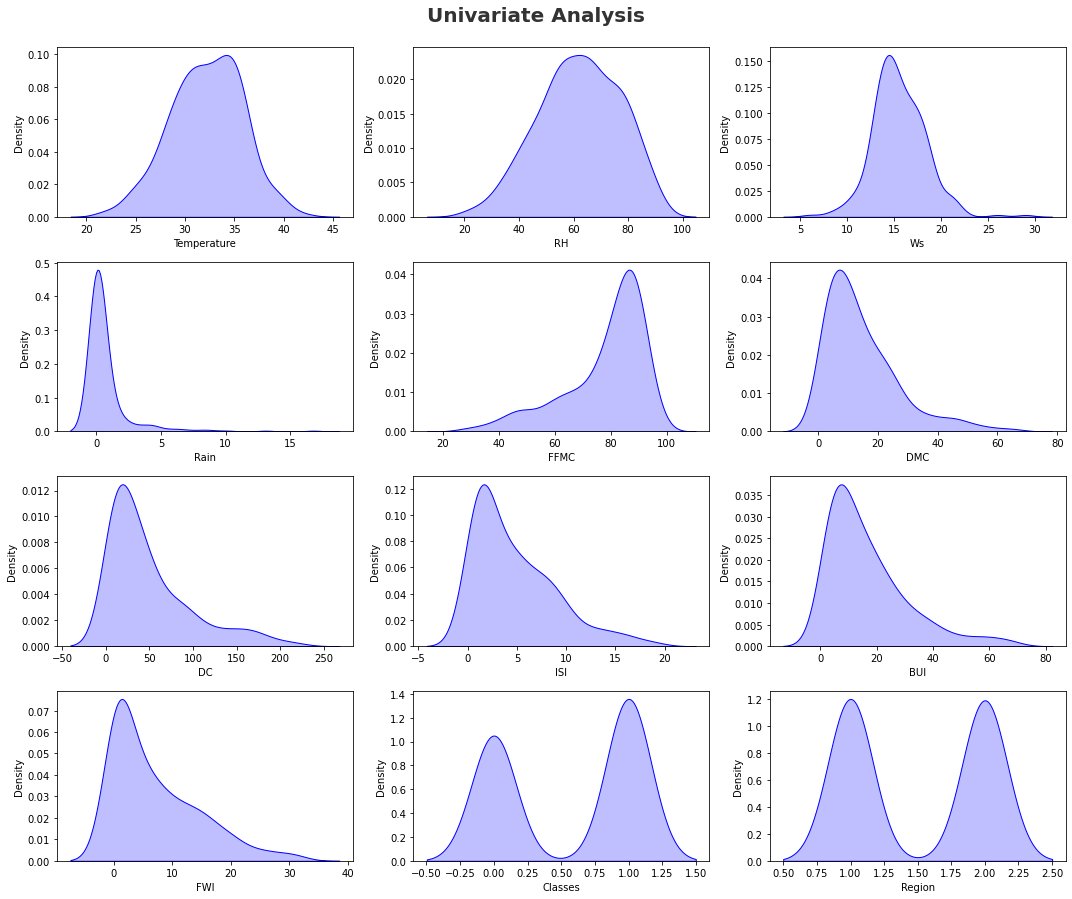

In [40]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df1[num_feat[i]],shade=True, color='b')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

#### Scatter plot for trend

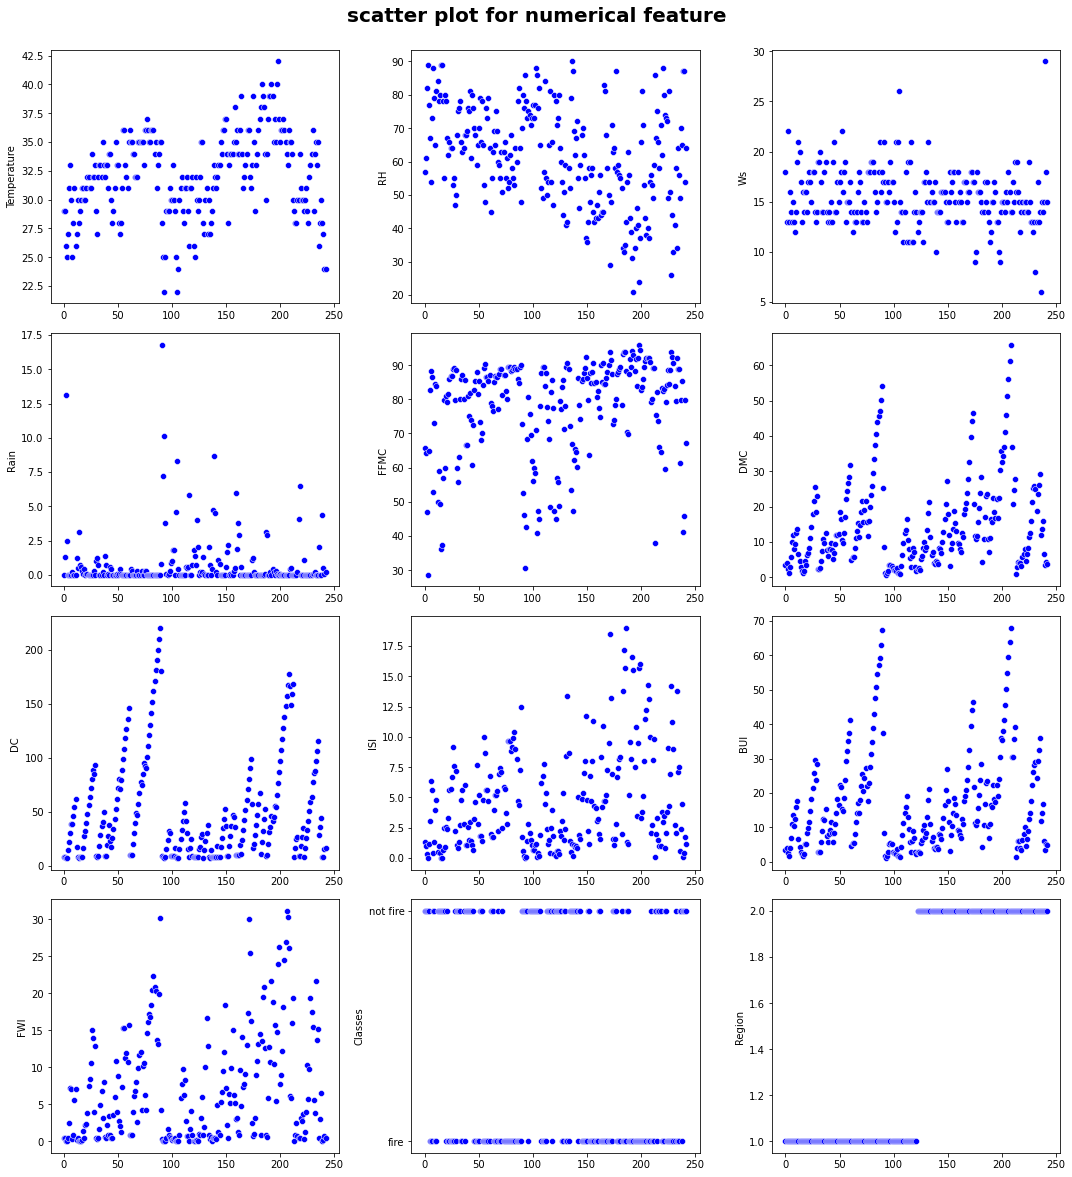

In [41]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot for numerical feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=num_feat[i], x=df1.index, data=df , color = 'b')
    plt.tight_layout()

### 4.3 Bivariate Analysis  

#### Correlation between different variables:

In [42]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


#### Pairplot

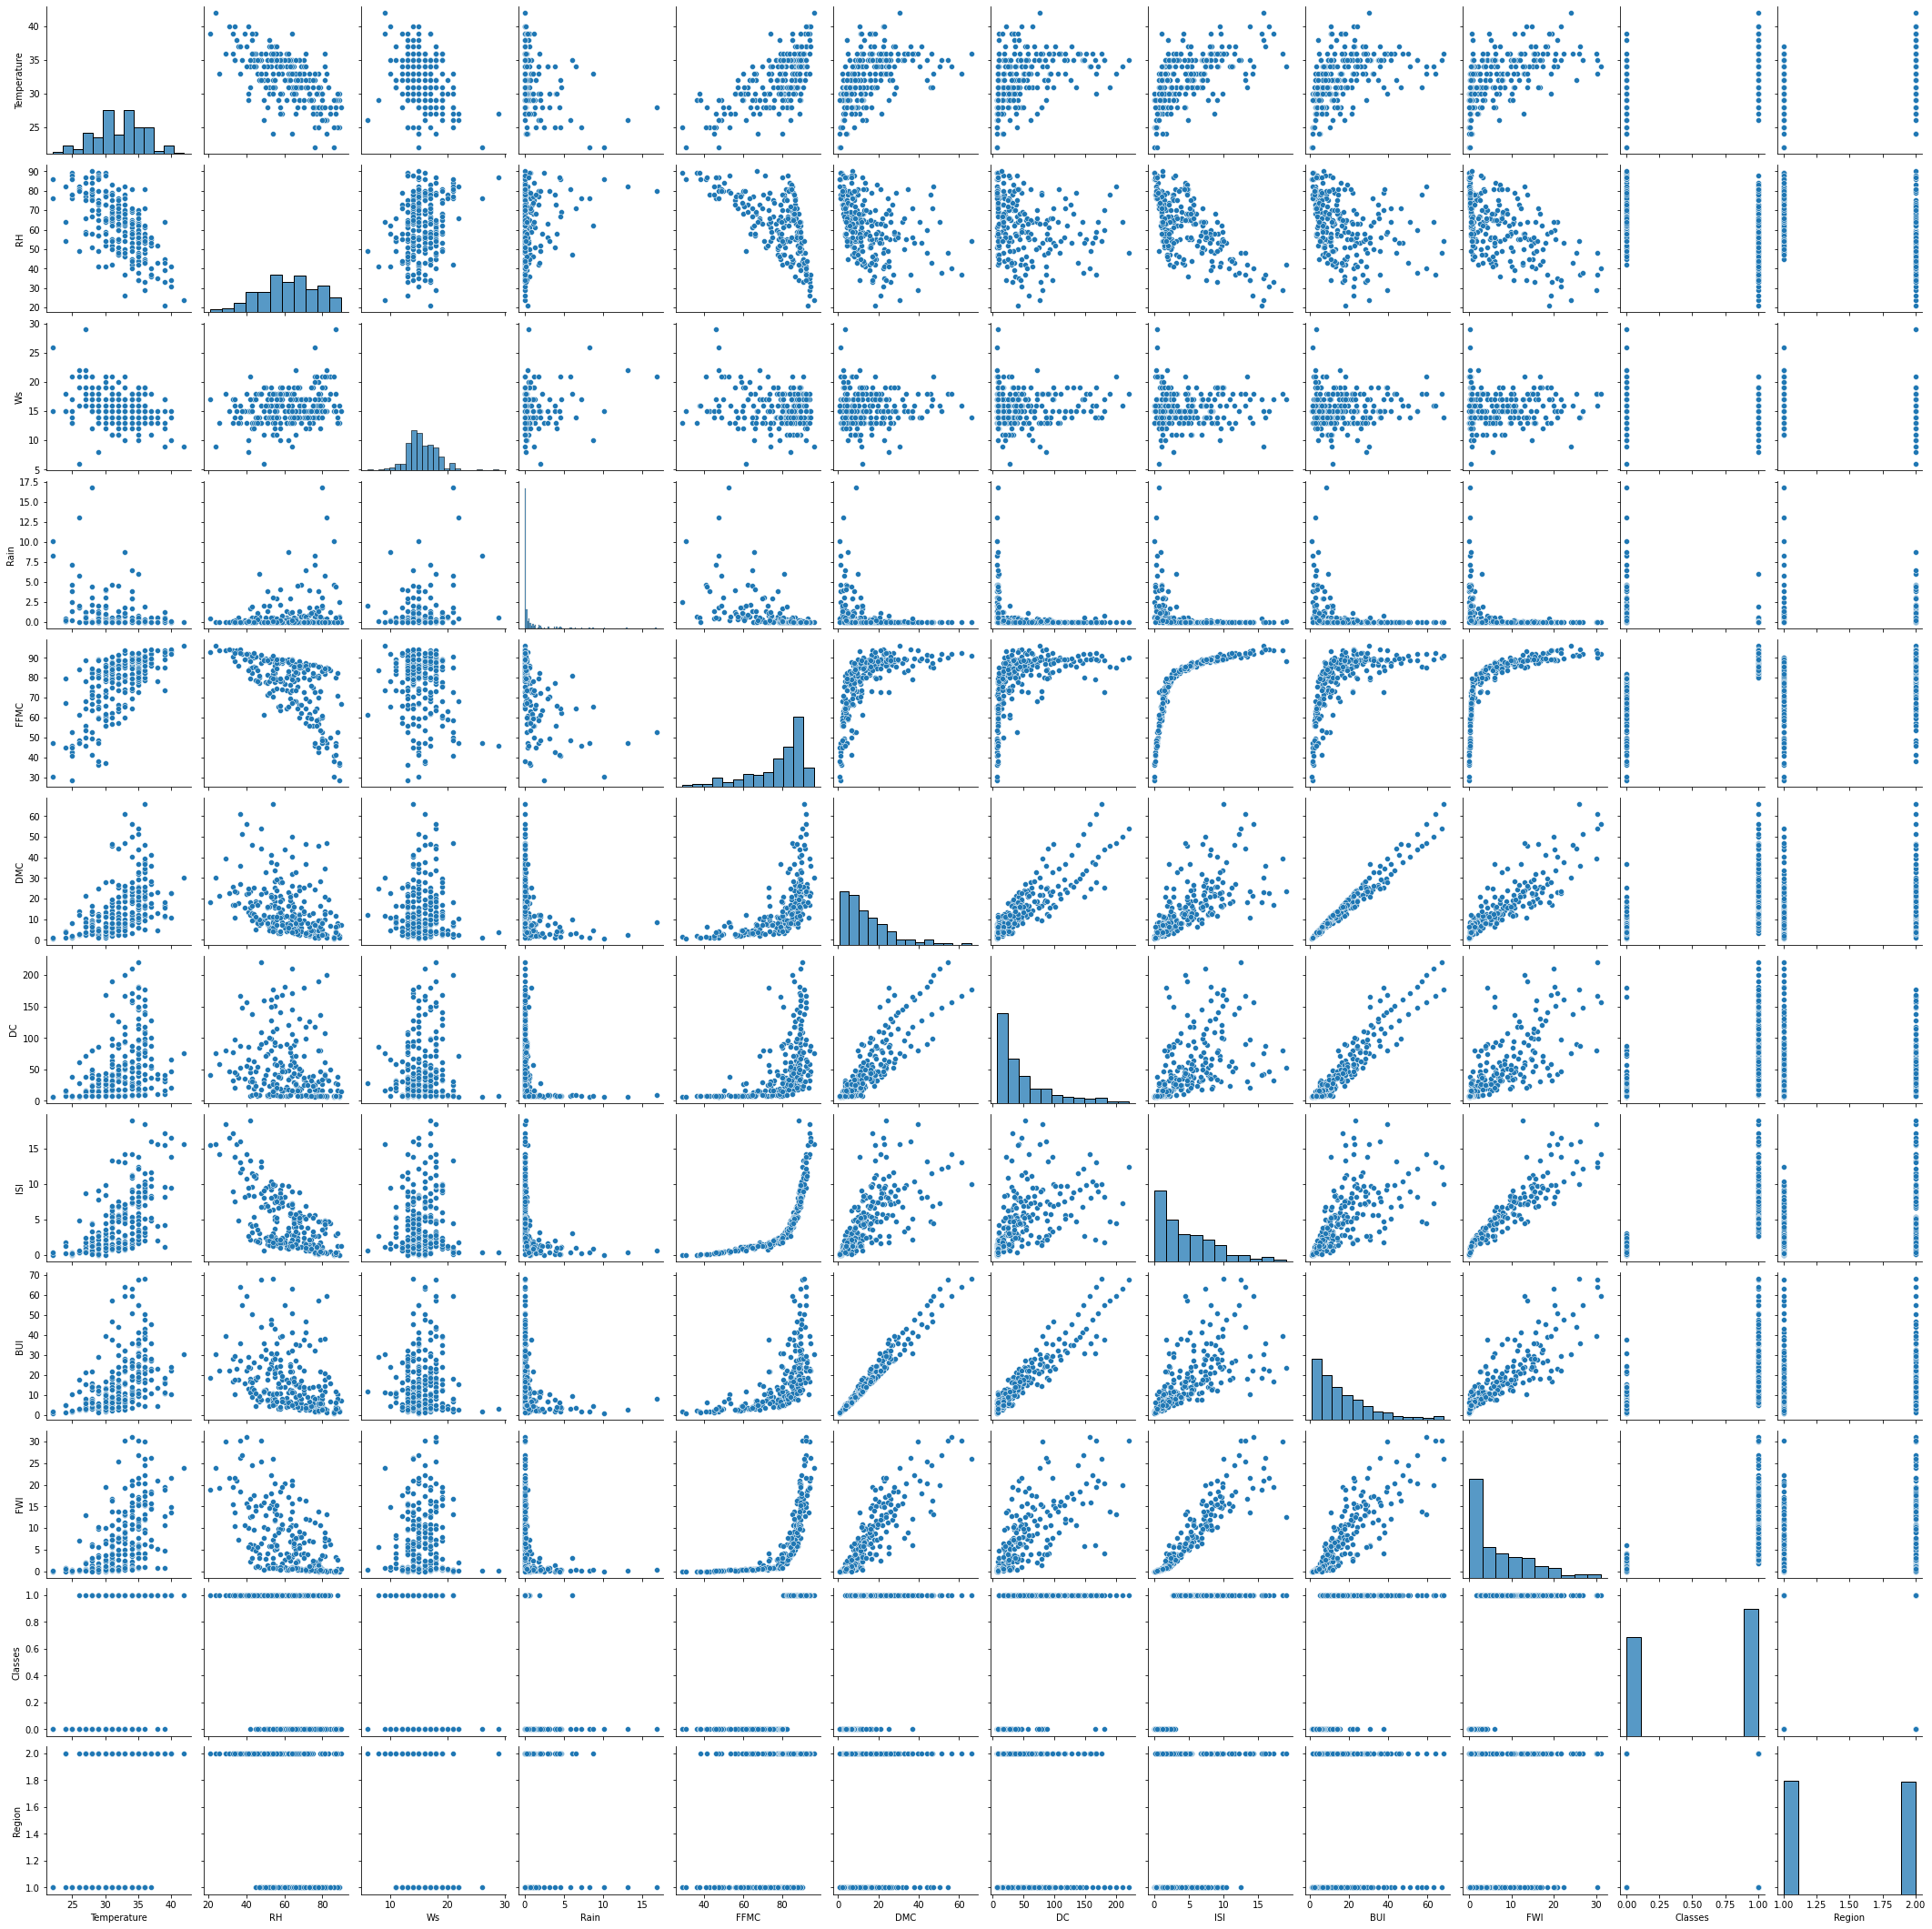

In [43]:
sns.pairplot(data = df1)

#### Heatmap for multicollinearity

<AxesSubplot:>

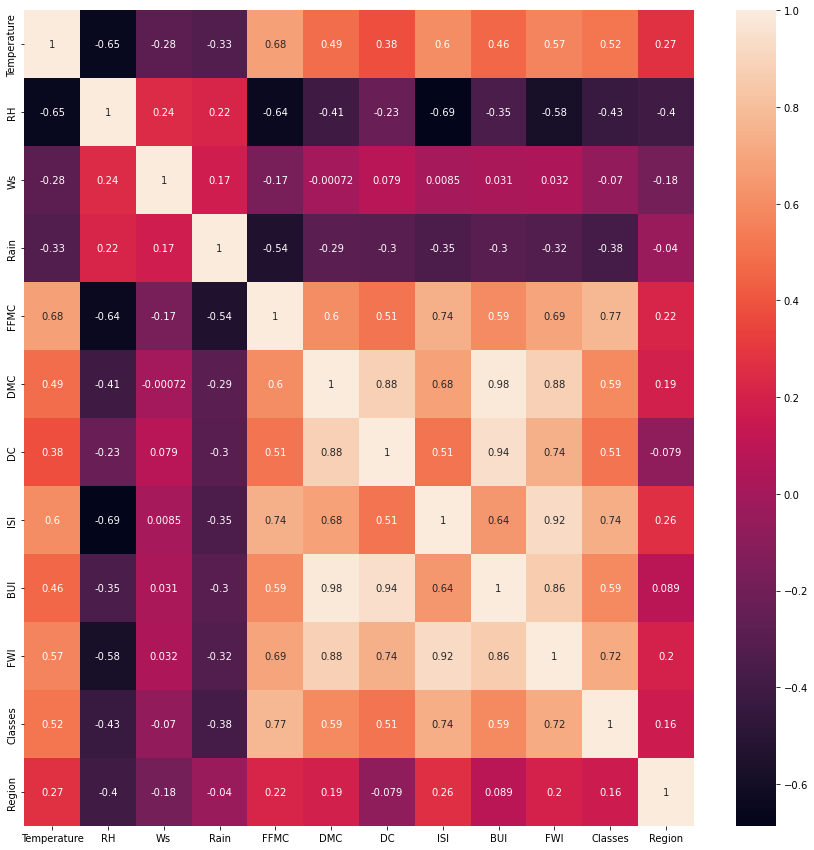

In [44]:
plt.figure(figsize = (15,15))
sns.heatmap(df1.corr(),annot=True)

__Observation__: 

* RH is negatively corelated with Temperature, FFMC, ISI and FWI
* Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI
* FFMC is highly positively correlated with ISI , BUI , DC , DMC and FFMC

### 4.4 Boxplot for Outliers:

<AxesSubplot:>

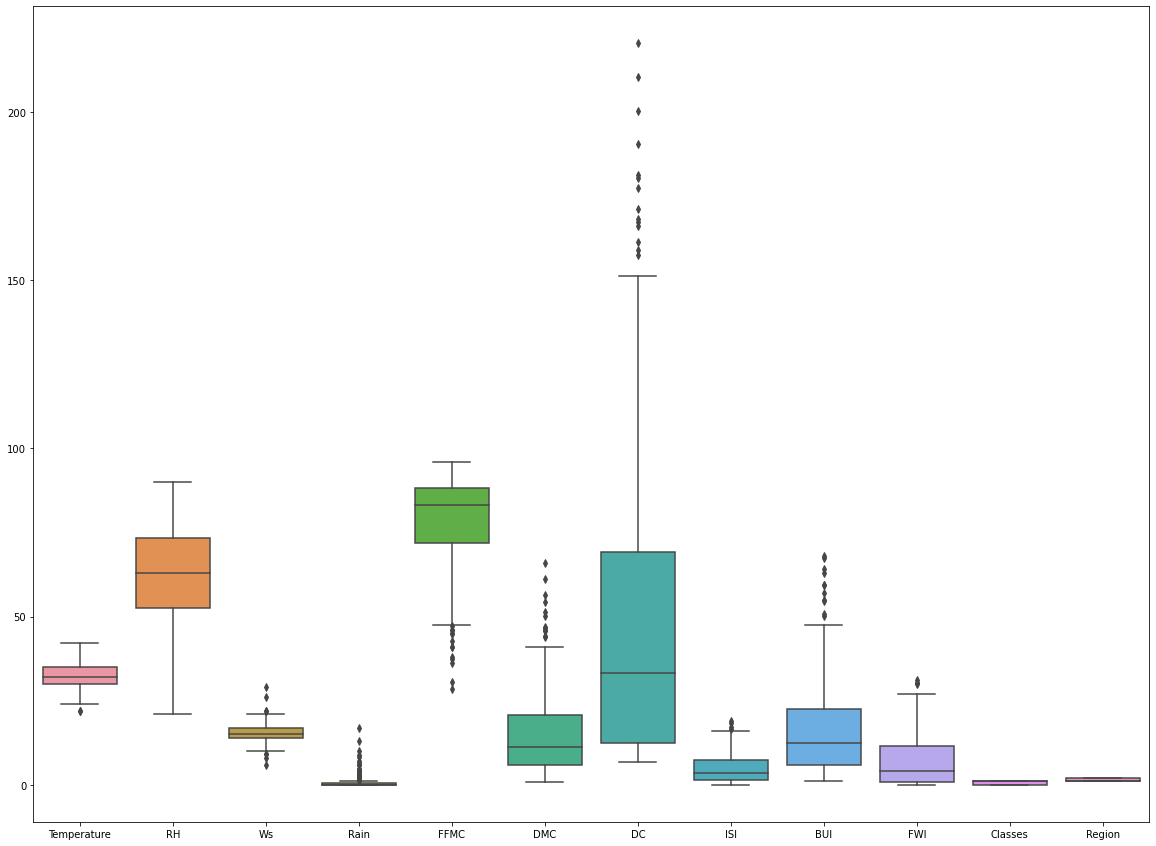

In [45]:
plt.figure(figsize=(20, 15))

sns.boxplot(data = df1 , orient = "v")

__Observation:__  
* Features like Rain , FFMC, DMC , DC , BUI have many Outliers 

### 4.5 Graphical Analysis  

### Region where Fire breaks out most times: 

<AxesSubplot:xlabel='Region', ylabel='Classes'>

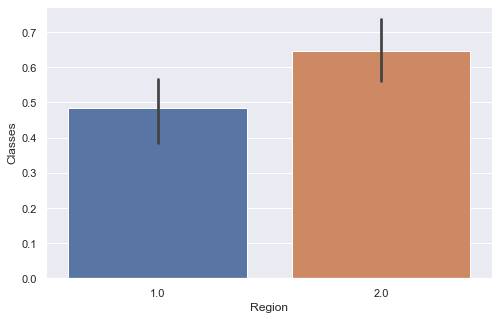

In [117]:
plt.figure(figsize=(8,5)) 
sns.barplot( x = 'Region' , y = 'Classes' , data = df  )

__Observation:__  
The Sidi Bel-abbess region has more cases of Fire breaking Out than Bejaia region    

### Monthwise Fire Analysis

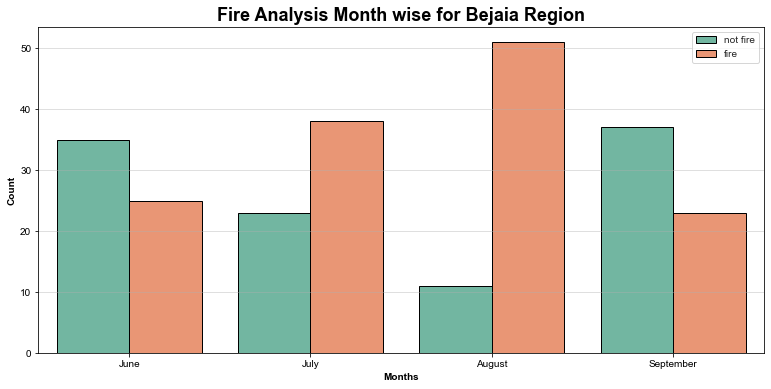

In [47]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

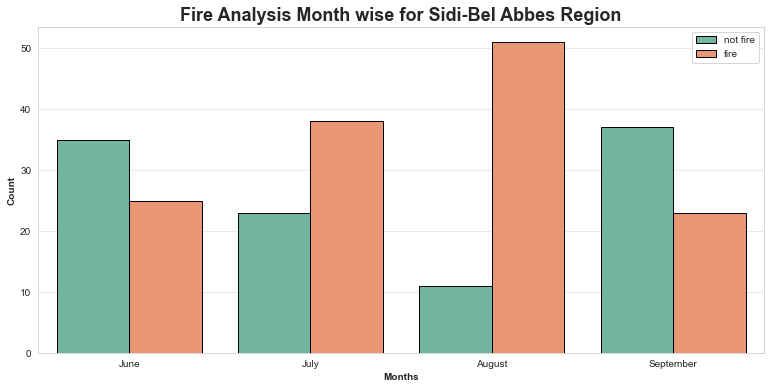

In [48]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

### Temperature condition in most of areas

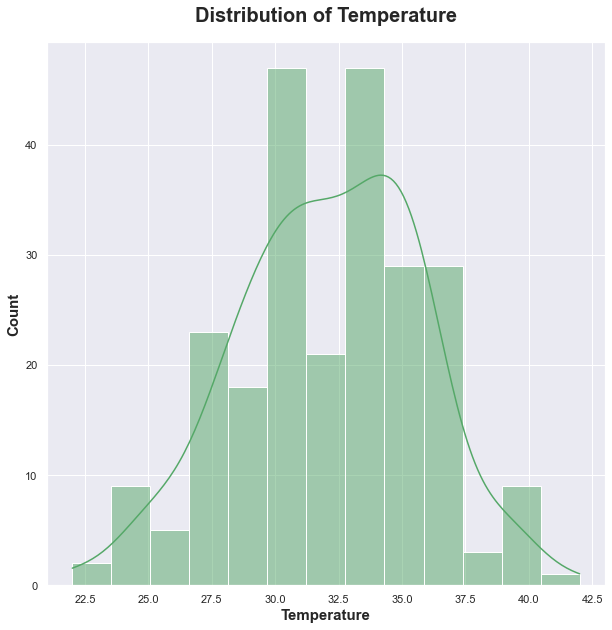

In [114]:
plt.subplots(figsize=(10,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='g',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

__Observation:__  
Temperature is mostly between 30-35 degree celcius

### What is the average temperature of different regions ? 

Text(0.5, 1.0, 'Avg Temperature of Both Regions')

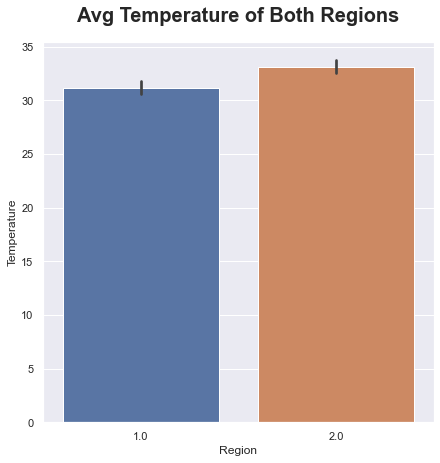

In [111]:
plt.subplots(figsize=(7,7))
sns.barplot(y =df['Temperature'], x = df['Region'] , data = df )
plt.title("Avg Temperature of Both Regions",weight='bold',fontsize=20,pad=20)

__Observation:__  
Sidi Bel-abbess region has comaprarively higher avg temperature than Bejaia region

In [51]:
df['Temperature'].groupby(df['Region']).mean()

Region
1.0    31.180328
2.0    33.132231
Name: Temperature, dtype: float64

#### Percentage of fire

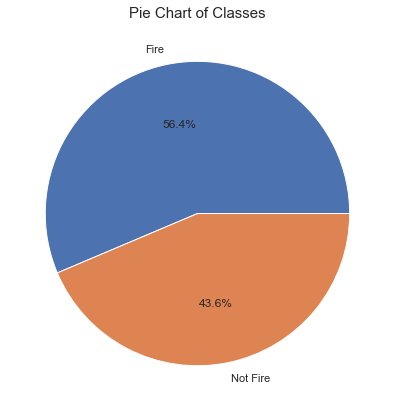

In [113]:
percentage=df.Classes.value_counts(normalize=True)*100
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(7,7))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

__Observation:__  
On 56.6% of days recorded , Fire broke out 

__Observation:__  
The bejaia region had comparatively more Rain than Sidi bel-abbess region.  

#### Regression plot for effect of TEmperature on different factorrs

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

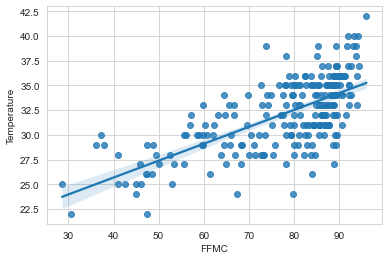

In [55]:
sns.regplot(x='FFMC',y='Temperature',data=df )

AxesSubplot(0.125,0.125;0.775x0.755)


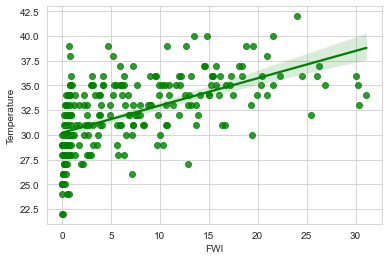

In [56]:
print(sns.regplot(x='FWI',y='Temperature',data=df , color = 'g'))

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

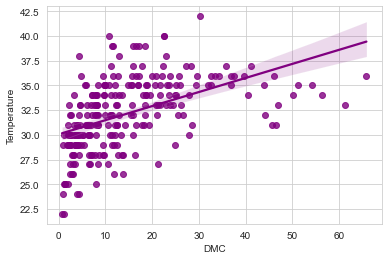

In [57]:
sns.regplot(x='DMC',y='Temperature',data=df , color = 'purple')

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

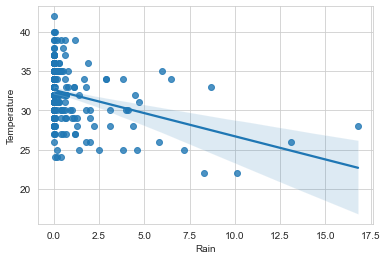

In [58]:
sns.regplot(x='Rain',y='Temperature',data=df)

__Observation:__  
Temperature has  :  
* positive linear relation with FFMC i.e. more the number of cured fine fuels and moisture more is the temperature.
* positive linear relation with FWI i.e. More the temperature , more is the potential of Forest Fire.
* positive linear relation with DMC i.e. More the organic content as moisture , more is the potential of Forest Fire.
* negative linear relation with Rain 

### Which Region had the higher RH ?

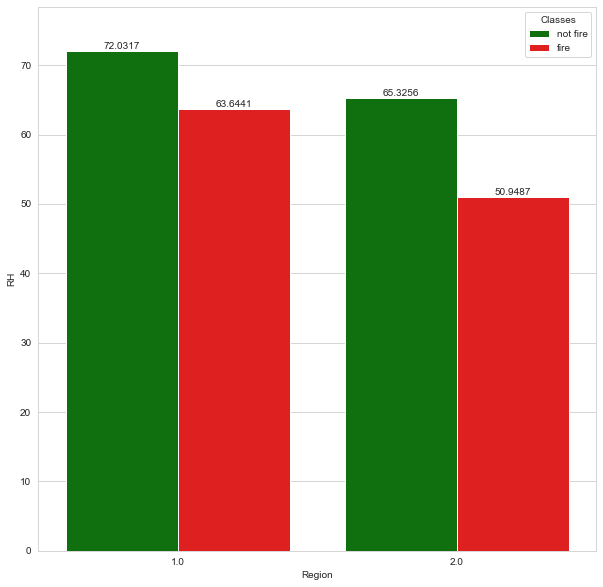

In [59]:
plt.figure(figsize = (10,10))
palette = ['green' ,'red']
ax = sns.barplot(x = "Region" , y = "RH" , hue = 'Classes' , data = df , palette =palette , errwidth = 0 )
for i in ax.containers:
    ax.bar_label(i,)

__Observation:__  
* Bejaia region had more RH value in cae of both Fire and Not Fire



### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.

In [60]:
# Saving The Structured File : 
df.to_csv('Algerian_Forest_Fire_Cleaned.csv' , index = False )

# 5 . Data Preprocessing

## 5.1 Import Libraries

In [61]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import scikitplot as skl
sns.set()

## 5.2 Import Cleaned Dataset

In [62]:
df = pd.read_csv('Algerian_Forest_Fire_Cleaned.csv')

In [63]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## 5.3 Train Test Split

In [64]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [65]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [66]:
X = df.drop('Classes',axis=1)
y= df['Classes']

In [67]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
X_train.shape, X_test.shape

((170, 11), (73, 11))

#### Checking multicollinearlity and remove highly corrrelated features

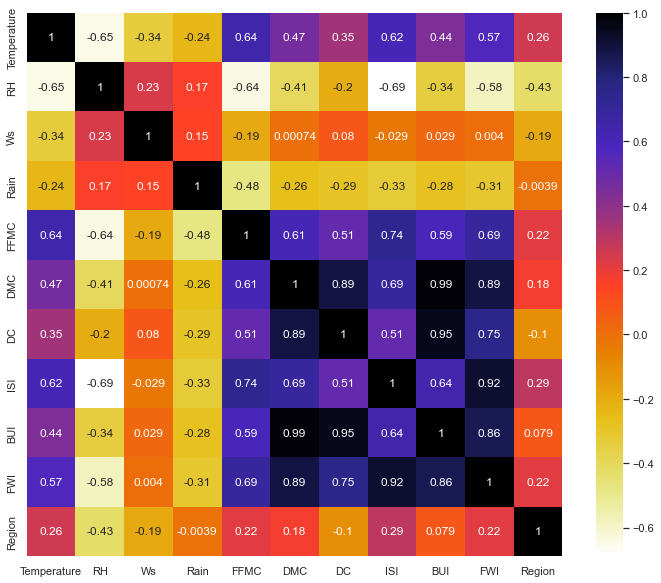

In [68]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [69]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [70]:
corr_features = correlation(X_train, 0.75)

In [71]:
corr_features

{'BUI', 'DC', 'FWI'}

In [72]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 8), (73, 8))

### 5.4 Feature Scaling

In [73]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [74]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [84]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train_scaled,i) for i in range(X_train_scaled.shape[1])]
vif["Features"] = X_train.columns

#let's check the values
vif

,vif,Features
0,2.301448,Temperature
1,2.823884,RH
2,1.295956,Ws
3,1.411396,Rain
4,3.301002,FFMC
5,2.113939,DMC
6,3.720027,ISI
7,1.267409,Region


# 6. Logistic Regression Model

In [85]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [88]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    

In [91]:
y_pred = log_reg.predict(X_test_scaled)

### Performance metrics

In [99]:
# Accuracy score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.958904109589041

### Confusion matrix

In [97]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[24,  1],
       [ 2, 46]], dtype=int64)

In [98]:
# naming matrix
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

#### Accuracy 

In [100]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.958904109589041

#### Precision

In [101]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.96

#### Recall

In [102]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9230769230769231

#### F1 score

In [103]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9411764705882353

#### Area Under Curve

In [104]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9591666666666667

#### ROC

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

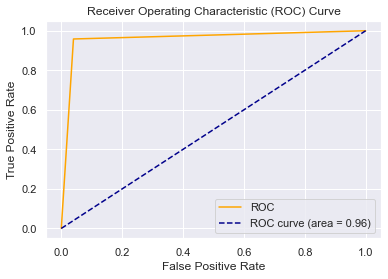

In [106]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Classification report :

we can get the performance metrics directly using classification_report also

In [107]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.98      0.96      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



| Metrics     | Definition  |
| ----------- | ----------- |
| Precision      | Precision is defined as the ratio of true positives to the sum of true and false positives.       |
| Recall   | Recall is defined as the ratio of true positives to the sum of true positives and false negatives.        |
| F1 Score  | The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.   |

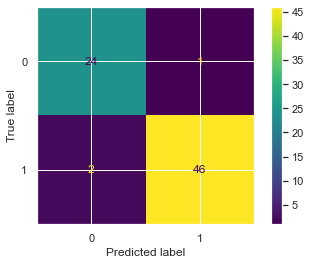

In [108]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test_scaled, y_test)

## Conclusion 

* This prediction can be used for calculating if the fire is possible at the location based on inputs. 
* Classification model using Linear Regression is Ready for Further Hyper tuning.
* The accuracy of the model is 96% approx
* Precision is 96% and Recall is approx 92 %.